# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
# custom loss function
def loss_function(y_true, y_pred):
    """
    Custom loss function

    E = exp{-sum[i=1,j; 1/2 * [pred(j) - test(j)]^2]}

    Parameters
    ==========
    y_true : np.array
        - true values
    y_pred : np.array
        - predicted values
    """
    return K.sum(1 / 2 * K.square(y_pred - y_true))

# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y=[]
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [3]:
# set neurons
neurons = 8

# get random indexes for initial centers
indices = rnd.sample(range(len(X_train)), neurons)

# dataset info
samples, feats = X_train.shape

# create model layers
inputs = Input(name='Inputs', shape=(feats,))
fuzz = FuzzyLayer(neurons, input_dim=feats,
                  initializer_centers=
                  lambda x: np.transpose(np.array([X_train[i] for i in indices])))
#defuzz = DefuzzyLayer(5, input_dim=neurons)
norm = NormalizedLayer(neurons)
weights = WeightedLayer(neurons)
raw = OutputLayer()
pred = Dense(3, activation='softmax')

# run through layers
phi = fuzz(inputs)
psi = norm(phi)
f = weights([inputs, psi])
out = raw(f)
output = pred(out)

# define model
model = Model(inputs=inputs, outputs=output)

# loss = 'mean_squared_error'
loss = loss_function
optimizer = 'adam'
metrics = ['binary_accuracy']

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

model.fit(np.array(X_train),
          np.array(y_train),
          epochs=100,
          verbose=1,
          batch_size=2)

Epoch 1/100
135/135 [==============================] - 2s 15ms/step - loss: 0.6465 - binary_accuracy: 0.6667
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5968 - binary_accuracy: 0.6716
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5330 - binary_accuracy: 0.7136
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4639 - binary_accuracy: 0.7506
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4069 - binary_accuracy: 0.8420
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3615 - binary_accuracy: 0.8568
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3180 - binary_accuracy: 0.8593
Epoch 8/100
135/135 [==============================] - 0s 2ms/step - loss: 0.2893 - binary_accuracy: 0.8617
Epoch 9/100
135/135 [==============================] - 0s 2ms/step - loss: 0.2683 - binary_accuracy: 0.8667
Epoch 10/100
135/135 [=====

In [4]:
raw.get_weights()

[]

In [5]:
X_test

array([[6. , 2.9, 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [6.3, 3.4, 5.6, 2.4],
       [6. , 3. , 4.8, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.4, 3.8, 1.1],
       [6.6, 2.9, 4.6, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [5.1, 3.8, 1.6, 0.2],
       [5.5, 2.6, 4.4, 1.2]])

In [6]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [7]:
y_pred = model.predict(X_test)
y_pred.round()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [8]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [9]:
acc.sum() / acc.size

1.0

## Model Prediction Results

In [10]:
pred_loss, pred_bin_acc = model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 4ms/step
Model Loss: 0.14861028
Binary Accuracy: 100.0%


In [11]:
model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


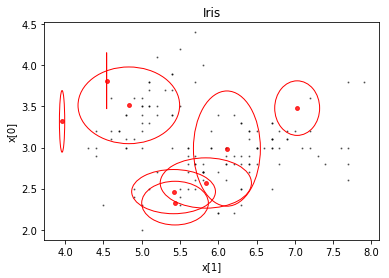

In [12]:
w = fuzz.get_weights()


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()

In [ ]:
import keras
from sofenn.layers import FuzzyLayer
from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np

x_train = np.random.normal(5, 1, size=(100, 2))
y_train = np.random.normal(5, 15, size=(100, 4))

model = Sequential()
model.add(Dense(2, activation='sigmoid'))
model.add(FuzzyLayer(8))
model.add(Dense(8, activation='sigmoid'))
model.add(DefuzzyLayer(4))

model.compile(loss='logcosh',
              optimizer='rmsprop',
              metrics=['mae', 'acc'])

model.fit(x_train, y_train,
          epochs=10000,
          verbose=1,
          batch_size=100)

print(model.predict( np.array([[5, 5]])))
print(model.predict( np.array([[5, 15]])))
print(model.predict( np.array([[15, 5]])))
print(model.predict( np.array([[15, 15]])))